# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [1]:
# Load pickled data
import pickle
import csv
from PIL import Image

# TODO: Fill this in based on where you saved the training and testing data

training_file =  "../traffic-signs-data/train.p"
validation_file= "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# read csv to get traffic symbol names
traffic_symbols = []
with open('signnames.csv') as signname_file:
    signname_reader = csv.DictReader(signname_file)
    traffic_symbols = [row['SignName'] for row in signname_reader]

In [2]:
#Print shape of training set
print("Shape : " + str(X_train[0].shape))

#Print traffic symbols
for i in range(len(traffic_symbols)):
    print( str(i+1) + ")" + traffic_symbols[i])

Shape : (32, 32, 3)
1)Speed limit (20km/h)
2)Speed limit (30km/h)
3)Speed limit (50km/h)
4)Speed limit (60km/h)
5)Speed limit (70km/h)
6)Speed limit (80km/h)
7)End of speed limit (80km/h)
8)Speed limit (100km/h)
9)Speed limit (120km/h)
10)No passing
11)No passing for vehicles over 3.5 metric tons
12)Right-of-way at the next intersection
13)Priority road
14)Yield
15)Stop
16)No vehicles
17)Vehicles over 3.5 metric tons prohibited
18)No entry
19)General caution
20)Dangerous curve to the left
21)Dangerous curve to the right
22)Double curve
23)Bumpy road
24)Slippery road
25)Road narrows on the right
26)Road work
27)Traffic signals
28)Pedestrians
29)Children crossing
30)Bicycles crossing
31)Beware of ice/snow
32)Wild animals crossing
33)End of all speed and passing limits
34)Turn right ahead
35)Turn left ahead
36)Ahead only
37)Go straight or right
38)Go straight or left
39)Keep right
40)Keep left
41)Roundabout mandatory
42)End of no passing
43)End of no passing by vehicles over 3.5 metric to

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


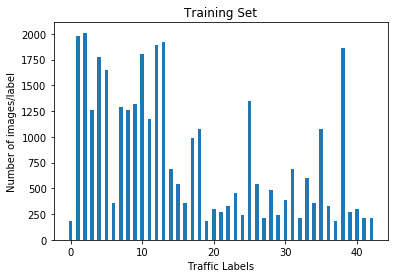

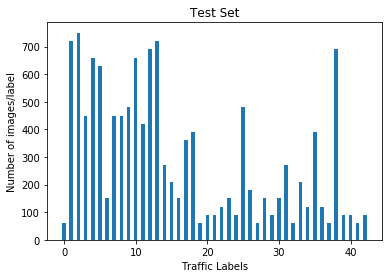

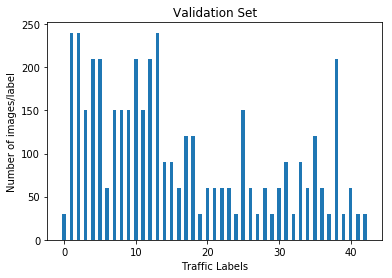

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import matplotlib.pyplot as plt

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)





#Number of images per class in the data set
def ImagesPerClass(n_classes,data,title):
    pos = range(n_classes)
    labelList = data.tolist()
    signCount = [labelList.count(i) for i in range(n_classes)]
    plt.bar(pos, signCount, width=0.5, align='center')
    plt.ylabel('Number of images/label')
    plt.xlabel('Traffic Labels')
    plt.title(title)
    plt.show()
    return signCount

    
train_signCount = ImagesPerClass(n_classes,y_train,'Training Set')
test_signCount  = ImagesPerClass(n_classes,y_test,'Test Set')
valid_signCount =ImagesPerClass(n_classes,y_valid,'Validation Set')



In [4]:
#Generate additional data for data set equalization
#Shifting data, Rotating, Blurring....
import scipy.ndimage
import random

rotate_angle = 20;

def blurImage(img, level):
    if x>0:
        kernel = np.ones((level,level),np.float32)/(x*x)
        return cv2.filter2D(img,-1,kernel)
    else:
        return img

def Generate(img):
    if (random.choice([True, False])):
        img = scipy.ndimage.interpolation.shift(img, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    #if (random.choice([True, False])):
     #   img = scipy.ndimage.filters.gaussian_filter(img,sigma = 7)
     #   img = blurImage(img,3)
    else:
        img = scipy.ndimage.interpolation.rotate(img, random.randrange(-rotate_angle, rotate_angle), reshape=False)
    return img

In [5]:
#Since the number of images per class are varying, it is better to have almost equal or nearly the same number of images
#so that the efficiency of network shall be good. Hence data augmentation is done

N_Samples = 1000
X_train_Gen = []
y_train_Gen = []

for index in range(len(train_signCount)):
    signCount = train_signCount[index]
    Multiple = round(N_Samples / signCount)

    if Multiple <= 1:
        continue
    
    print("Class {:d} has only {:d} samples, hence augmenting {:d} times.".format(index, signCount, Multiple))
    for feature, label in zip(X_train, y_train):
        if index == label:
            for augmentMultiple in range(Multiple):
                X_train_Gen.append(Generate(feature))
                y_train_Gen.append(label)

# append generated data to original data
X_train = np.append(np.array(X_train), np.array(X_train_Gen), axis=0)
y_train = np.append(np.array(y_train), np.array(y_train_Gen), axis=0)




Class 0 has only 180 samples, hence augmenting 6 times.
Class 6 has only 360 samples, hence augmenting 3 times.
Class 15 has only 540 samples, hence augmenting 2 times.
Class 16 has only 360 samples, hence augmenting 3 times.
Class 19 has only 180 samples, hence augmenting 6 times.
Class 20 has only 300 samples, hence augmenting 3 times.
Class 21 has only 270 samples, hence augmenting 4 times.
Class 22 has only 330 samples, hence augmenting 3 times.
Class 23 has only 450 samples, hence augmenting 2 times.
Class 24 has only 240 samples, hence augmenting 4 times.
Class 26 has only 540 samples, hence augmenting 2 times.
Class 27 has only 210 samples, hence augmenting 5 times.
Class 28 has only 480 samples, hence augmenting 2 times.
Class 29 has only 240 samples, hence augmenting 4 times.
Class 30 has only 390 samples, hence augmenting 3 times.
Class 32 has only 210 samples, hence augmenting 5 times.
Class 33 has only 599 samples, hence augmenting 2 times.
Class 34 has only 360 samples, he

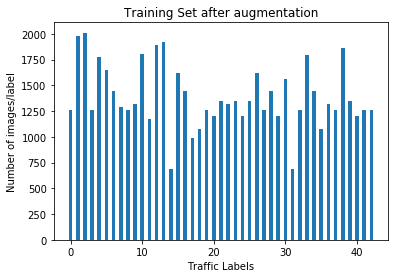

59727


In [6]:
count = ImagesPerClass(n_classes,y_train,'Training Set after augmentation')
print(len(y_train))

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
#Including the code here for data visualization and preprocessing before defining Training architecture.
#All required functions defined here
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

#Plot random traffic symbols
def plotRandSymbols(source,labels,axis_y,axis_x,i):
    index = random.randint(0, len(source))
    img = source[index].squeeze()
    plt.subplot(axis_x, axis_y, i)
    ax=plt.gca()
    plt.imshow(img)
    ax.text(0,-2,""+str(index) + "->" + str(traffic_symbols[labels[index]])).draw(ax.figure.canvas.get_renderer())          
    
    
#Histogram plot to get information about spectrum
def plotHistogram(source,labels,index,nx,sp):
    img = source[index].squeeze()
    plt.subplot(2, nx, sp)
    n, bins, patches=plt.hist(np.array(img).reshape((32*32,3)), bins=8, range=(0,img.max()),color=['red','green','blue'])
    plt.subplot(2, nx, nx+sp)
    ax=plt.gca()
    plt.imshow(img)
    ax.text(0,-2,""+str(index)+" => "+str(traffic_symbols[labels[index]])).draw(ax.figure.canvas.get_renderer())
    return n, bins, patches

#Normalization increases bit of contrast and makes image to appear brighter if it is dull/dark
clahe = cv2.createCLAHE(clipLimit=4.0,tileGridSize=(2,2))
def normalizeImage(img):
    nrm_Img=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    nrm_Img[:,:,0]=clahe.apply(nrm_Img[:,:,0])
    return (cv2.cvtColor(nrm_Img, cv2.COLOR_YUV2RGB))


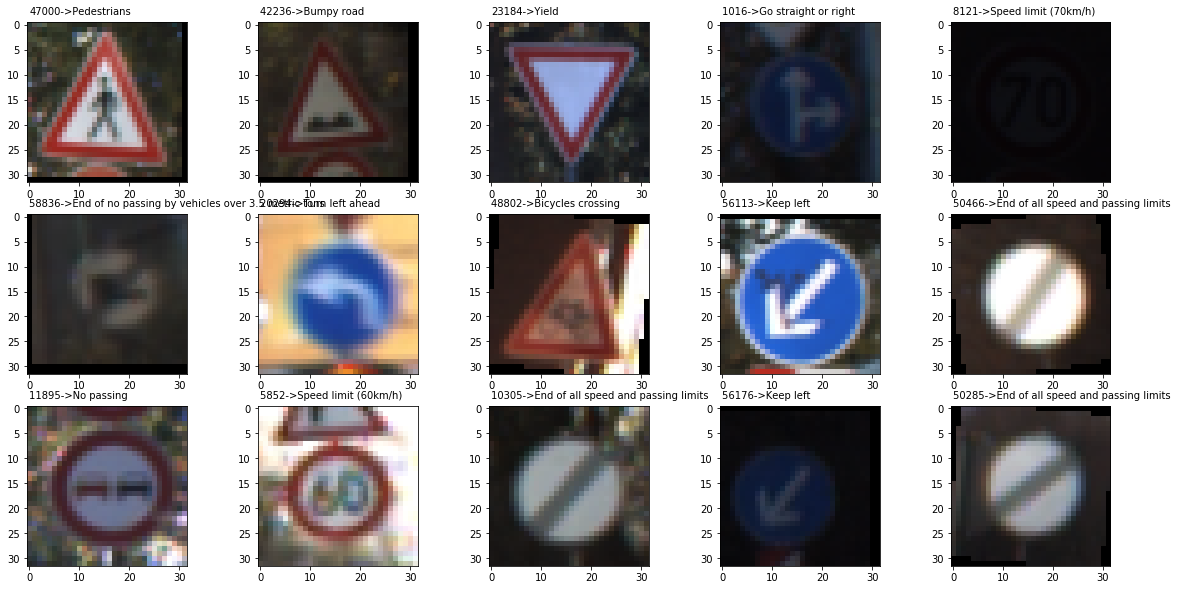

In [8]:
#Plot random traffic symbols
plt.figure(figsize=(20,10))
for index in range(1,16):
    plotRandSymbols(X_train,y_train,5,3,index)

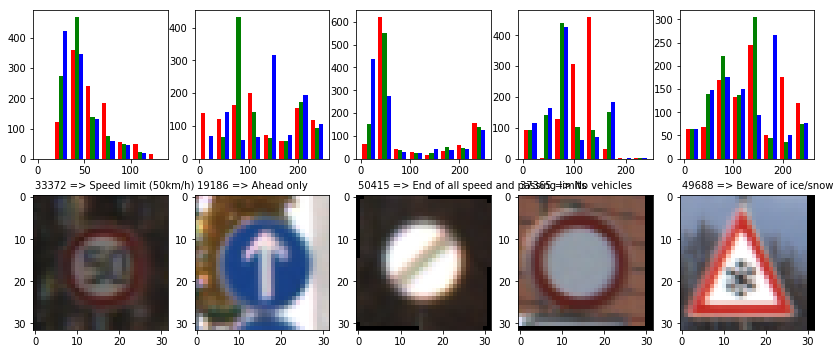

In [9]:
#Plot histogram of traffc symbols
plt.figure(figsize=(14,6))
for i in range(1,6):
    index = random.randint(0, len(X_train))
    plotHistogram(X_train,y_train,index,5,i)

In [10]:
#Building normalized image set from training, validation and test set data

X_train_Norm=[]
for i in range(len(X_train)):
    X_train_Norm.append(normalizeImage(X_train[i]))

X_valid_Norm=[]
for i in range(len(X_valid)):
    X_valid_Norm.append(normalizeImage(X_valid[i]))    
    
X_test_Norm=[]
for i in range(len(X_test)):
    X_test_Norm.append(normalizeImage(X_test[i]))
    

#plt.figure(figsize=(14,5))

#for i in range(1,4):
#    index = random.randint(0, len(X_train))
#    plotHistogram(X_train,y_train,index,6,i)
#    plotHistogram(X_train_Norm,y_train,index,6,i+3)

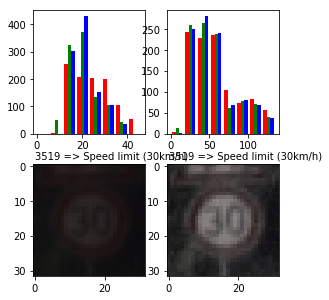

In [11]:
#Comparison of histograms after normalization
plt.figure(figsize=(14,5))
#random.seed(4000)
rand = random.randint(0,4000)
plotHistogram(X_train,y_train, rand , 6, 1);
plotHistogram(X_train_Norm,y_train, rand, 6, 2);

In [12]:
#Rescaling of data between 0.5 and -0.5
def Imgrescale(img):
    mn=img.min()
    mx=img.max()
    return ((img-mn)/(mx-mn))-0.5

X_train_Norm_float = np.float32(np.array(X_train_Norm, np.float32) / 255.0)
X_test_Norm_float  = np.float32(np.array(X_test_Norm, np.float32)  / 255.0)
X_valid_Norm_float = np.float32(np.array(X_valid_Norm, np.float32) / 255.0)




In [13]:
X_train_Resc=[]
for i in range(len(X_train_Norm_float)):
    X_train_Resc.append(Imgrescale(X_train_Norm_float[i]))
X_train_Resc=np.array(X_train_Resc, np.float32)

In [14]:
X_valid_Resc=[]
for i in range(len(X_valid_Norm_float)):
    X_valid_Resc.append(Imgrescale(X_valid_Norm_float[i]))
X_valid_Resc=np.array(X_valid_Resc, np.float32)


X_test_Resc=[]
for i in range(len(X_test_Norm_float)):
    X_test_Resc.append(Imgrescale(X_test_Norm_float[i]))
X_test_Resc=np.array(X_test_Resc, np.float32)

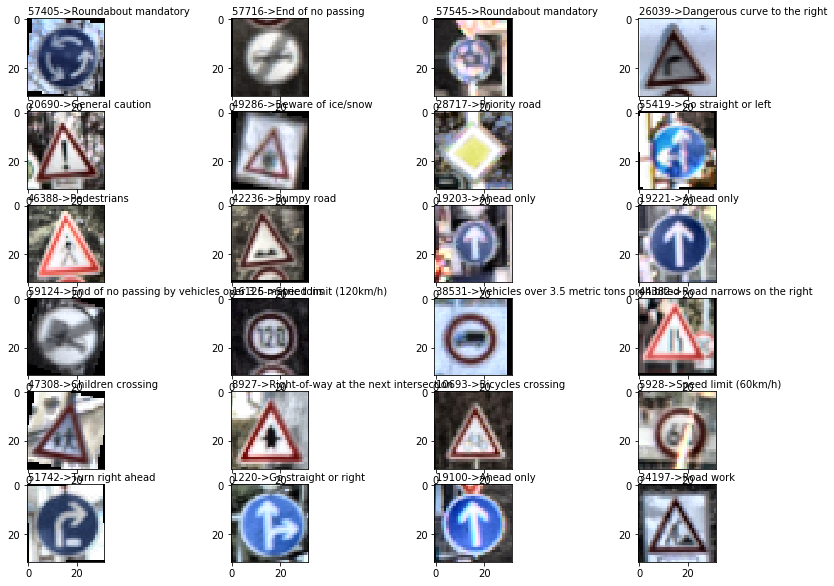

In [15]:
plt.figure(figsize=(14,10))
for i in range(1,25):
    plotRandSymbols(X_train_Resc+0.5, y_train,4,6,i)

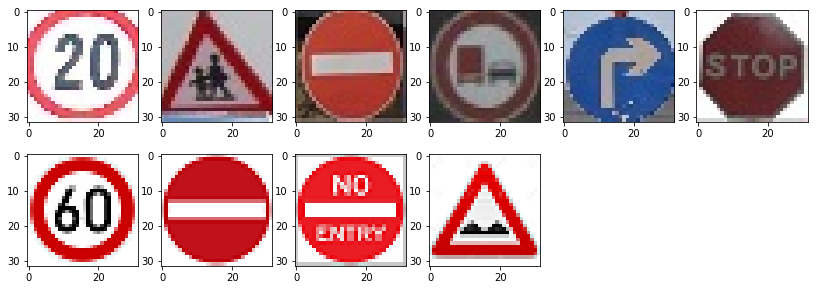

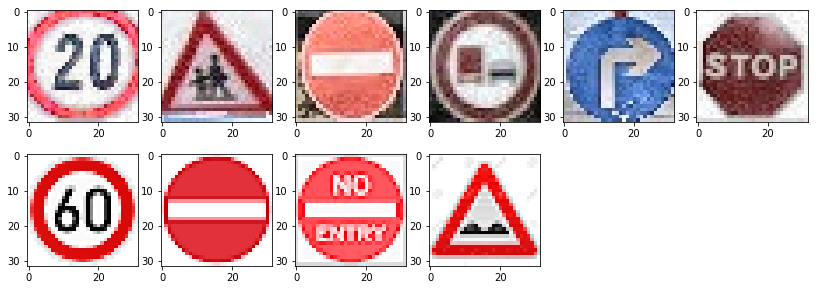

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Importing the sample German traffic symbols from internet which are placed in project folder and named TrafficSignsExample/
import matplotlib.image as mpimg


TestImg = []
for idx in range(1,11):
    image = mpimg.imread("../TrafficSignsExamples/{:02}.png".format(idx))
    TestImg.append(image)

TestImg=np.array(TestImg, np.float32)
TestImg=TestImg*255
TestImg=np.uint8(TestImg)   

TestImg_N=[]
for i in range(len(TestImg)):
    TestImg_N.append(Imgrescale(np.float32(normalizeImage(TestImg[i]))))


plt.figure(figsize=(14,7.5))
for i in range(len(TestImg)):
    plt.subplot(3,6,i+1)
    plt.imshow(TestImg[i])

plt.figure(figsize=(14,7.5))
for i in range(len(TestImg_N)):
    plt.subplot(3,6,i+1)
    plt.imshow(TestImg_N[i]+0.5)

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#combining conv, bias addition and relu activation
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


In [18]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


In [19]:
def fullyconnected(x, W, b):
    fc = tf.add(tf.matmul(x, W), b)
    return fc


In [20]:
#Following the LeNet architecture
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    weights = {
        'layer_1': tf.Variable(tf.truncated_normal([5, 5, 3, 12], mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal([7, 7, 12, 28], mean=mu, stddev=sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal([4*4*28, 240], mean=mu, stddev=sigma)),
        'fully_connected_2': tf.Variable(tf.truncated_normal([240, 124], mean=mu, stddev=sigma)),
        'n_classes': tf.Variable(tf.truncated_normal([124, 43], mean=mu, stddev=sigma))
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(12)),
        'layer_2': tf.Variable(tf.zeros(28)),
        'fully_connected_1': tf.Variable(tf.zeros(240)),
        'fully_connected_2': tf.Variable(tf.zeros(124)),
        'n_classes': tf.Variable(tf.zeros(43)),
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1=conv2d(x, weights['layer_1'], biases['layer_1'])

    # TODO: Activation.
    # User defined conv2d is doing this.

    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1=maxpool2d(conv1)

    # TODO: Layer 2: Convolutional. Output = 8x8x28.
    conv2=conv2d(conv1, weights['layer_2'], biases['layer_2'])
    
    # TODO: Activation.
    # User defined conv2d is doing this.

    # TODO: Pooling. Input = 10x10x16, Output = 4x4x28
    conv2=maxpool2d(conv2)

    # TODO: Flatten. Input = 4x4x28,Output = 448.
    flat=tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected, Input = 448,Output = 240.
    fc1=fullyconnected(flat, weights['fully_connected_1'], biases['fully_connected_1'])
    
    # TODO: Activation.
    fc1=tf.nn.softsign(fc1)

    # TODO: Layer 4: Fully Connected. Input = 240. Output = 124.
    fc2=fullyconnected(fc1, weights['fully_connected_2'], biases['fully_connected_2'])
    
    # TODO: Activation.
    fc2=tf.nn.softsign(fc2)

    # TODO: Layer 5: Fully Connected. Input = 124. Output = 43.
    out=fullyconnected(fc2, weights['n_classes'], biases['n_classes'])
    
    return out
   

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

learnrate = 0.002

out = LeNet(x)
logits=tf.nn.softsign(out)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learnrate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sm=tf.nn.softmax(out)
#inference_operation = tf.argmax(out, 1)




In [23]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
def entropy(probs):
    idx=np.where(probs>0)
    lprobs=np.log(probs[idx])
    return abs(np.sum(probs[idx]*lprobs))

Training in progress
--------------------
EPOCH 1 ... Validation Accuracy = 0.738
EPOCH 2 ... Validation Accuracy = 0.820
EPOCH 3 ... Validation Accuracy = 0.859
EPOCH 4 ... Validation Accuracy = 0.844
EPOCH 5 ... Validation Accuracy = 0.847
EPOCH 6 ... Validation Accuracy = 0.860
EPOCH 7 ... Validation Accuracy = 0.871
EPOCH 8 ... Validation Accuracy = 0.865
EPOCH 9 ... Validation Accuracy = 0.881
EPOCH 10 ... Validation Accuracy = 0.883
EPOCH 11 ... Validation Accuracy = 0.887
EPOCH 12 ... Validation Accuracy = 0.858
EPOCH 13 ... Validation Accuracy = 0.859
EPOCH 14 ... Validation Accuracy = 0.869
EPOCH 15 ... Validation Accuracy = 0.874
EPOCH 16 ... Validation Accuracy = 0.893
EPOCH 17 ... Validation Accuracy = 0.908
EPOCH 18 ... Validation Accuracy = 0.905
EPOCH 19 ... Validation Accuracy = 0.923
EPOCH 20 ... Validation Accuracy = 0.910
EPOCH 21 ... Validation Accuracy = 0.884
EPOCH 22 ... Validation Accuracy = 0.906
EPOCH 23 ... Validation Accuracy = 0.929
EPOCH 24 ... Validation 

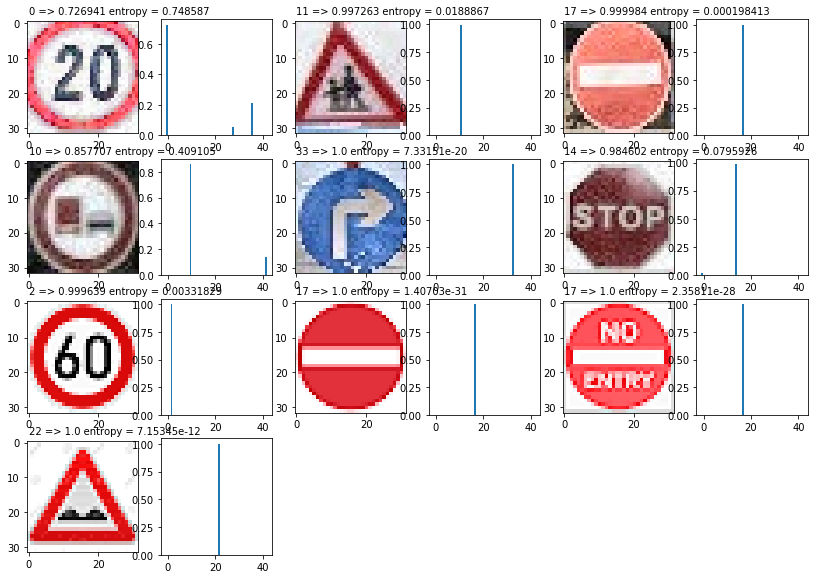

In [25]:
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 45
BATCH_SIZE = 512

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_Resc)
    
    print("Training in progress")
    print("--------------------")
    for i in range(EPOCHS):
        X_train_Resc, y_train = shuffle(X_train_Resc, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_Resc[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_Resc, y_valid)
        print("EPOCH {} ... ".format(i+1)+"Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    prediction = sess.run(sm, feed_dict={x: TestImg_N})
    tk = sess.run(tf.nn.top_k(sm, k=5), feed_dict={x: TestImg_N})
    test_accuracy = evaluate(X_test_Resc, y_test)

#Facing problem with saving the model. Hence using all the process to be run in a single session.
#Actually they have to be separated using resore. But since facing the problem. Had to run all at a time.
#    try:
#        saver
#    except NameError:
#        saver = tf.train.Saver()
#    saver.save(sess, '../lenet')
#    print("Model saved")

plt.figure(figsize=(14,15))
for i in range(len(prediction)):
    cls=np.where(prediction[i]==max(prediction[i]))
    plt.subplot(6,6,2*i+1)
    ax=plt.gca()
    plt.imshow(TestImg_N[i]+0.5)
    ax.text(0,-2.5,""+str(cls[0][0])+" => "+str(prediction[i,cls][0][0])+" entropy = "+str(entropy(prediction[i]))).draw(ax.figure.canvas.get_renderer())
    plt.subplot(6,6,2*i+2)
    plt.bar(np.arange(n_classes)-0.5, prediction[i])

In [27]:
print("Test Accuracy = {:.3f}".format(test_accuracy))    

print("Below are the top 5 softmax probabilities")
tk.indices


Test Accuracy = 0.938
Below are the top 5 softmax probabilities


array([[ 0, 36, 28, 39,  3],
       [11, 30, 18, 25,  1],
       [17, 13, 22, 14, 15],
       [10, 42,  7, 12,  5],
       [33, 40, 39, 36, 35],
       [14,  0, 11, 36,  1],
       [ 2,  3,  1,  0,  6],
       [17, 26, 23,  8, 13],
       [17, 26,  0,  8, 23],
       [22, 29,  8, 18, 26]])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
#The process of testing the images on Test data provided and the sample images from internet are done in the cells above
#where the model is evaluated due to the fact of unintended errors or exceptions caused by tensorflow which I am working on that.
#Sorry for that!!



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")